This notebook uses GrandientBoostingMachines to solve a classification problem.
<ul>
<li>Hyperparameters are observed using learning_curve</li>
<li>Hyperparameters are then searched using gridSearch </li>

In [1]:
# Necessary libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_validate, validation_curve
from matplotlib import pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score,accuracy_score
warnings.simplefilter(action='ignore', category=Warning)
from sklearn.model_selection import learning_curve

C:\Users\Nitin\AppData\Local\Temp\ipykernel_20884\1095707243.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv("datasets/ionosphere.csv",sep=",")
df.dropna(inplace=True)
df.head()

,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,...,a26,a27,a28,a29,a30,a31,a32,a33,a34,class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [3]:
# converting from string to numeric
df["class"]=df["class"].map({"g":1,"b":0})

In [4]:
y = df["class"] # dependent(target) variable
X = df.drop(["class"], axis=1) # independent variables

X.shape, y.shape

((351, 34), (351,))

In [5]:
# create GBM model
gbm_model = GradientBoostingClassifier(n_iter_no_change=5,
                                       validation_fraction=0.20,
                                       random_state=17).fit(X,y)

In [6]:
cv_results = cross_validate(gbm_model, X, y, cv=10, scoring=["f1"],
                            return_train_score=True)
# cv_results
print("train f1 score:",cv_results['train_f1'].mean())
print("test f1 score:",cv_results['test_f1'].mean())

train f1 score: 0.9829145147287344
test f1 score: 0.9406253424196468


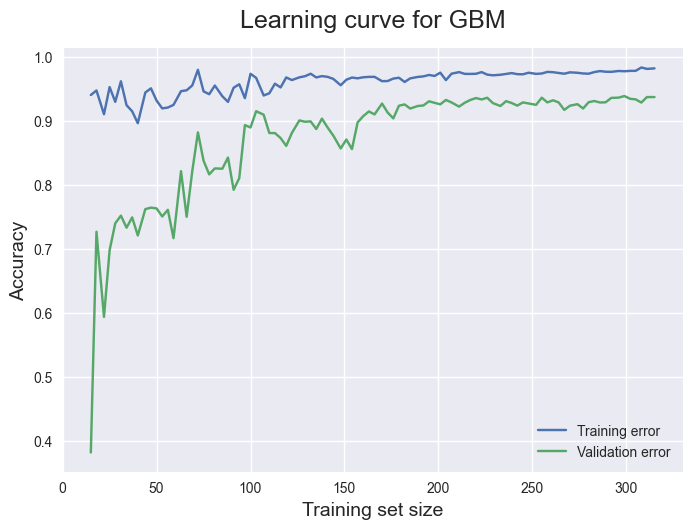

In [7]:
train_sizes, train_scores, test_scores = learning_curve(gbm_model, X, y, cv=10,
                                                        scoring='f1', n_jobs=-1, 
                                                        train_sizes=np.linspace(0.01, 1.0, 100))

train_mean = np.mean(train_scores, axis=1)
validation_mean = np.mean(test_scores, axis=1)

plt.style.use('seaborn-v0_8')

plt.plot(train_sizes, train_mean, label = 'Training error')
plt.plot(train_sizes, validation_mean, label = 'Validation error')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curve for GBM', fontsize = 18, y = 1.03)
plt.legend()

In [8]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [9]:
def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10):
    train_score, test_score = validation_curve(
        model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring, cv=cv)

    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)

    plt.plot(param_range, mean_train_score,
             label="Training Score", color='b')

    plt.plot(param_range, mean_test_score,
             label="Validation Score", color='g')

    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show(block=True)

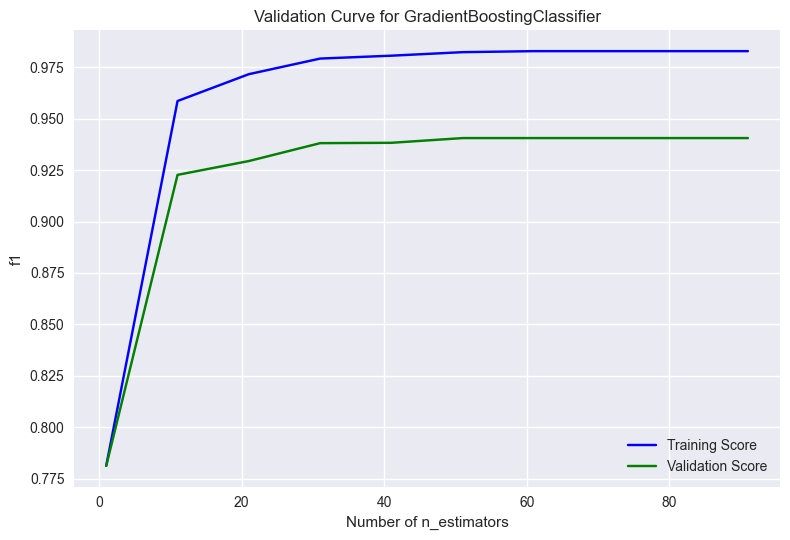

In [10]:
val_curve_params(gbm_model, X, y, "n_estimators", range(1,101,10), scoring="f1")

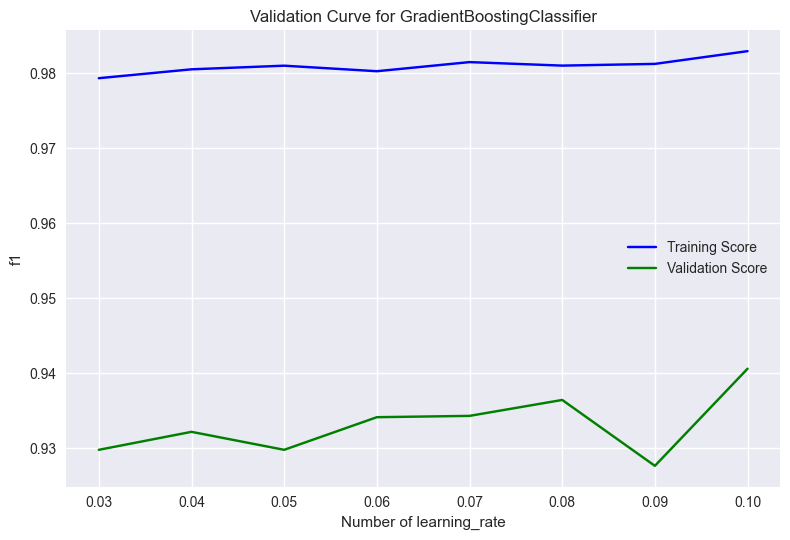

In [11]:
val_curve_params(gbm_model, X, y, "learning_rate", np.arange(0.03,0.1,0.01), scoring="f1")


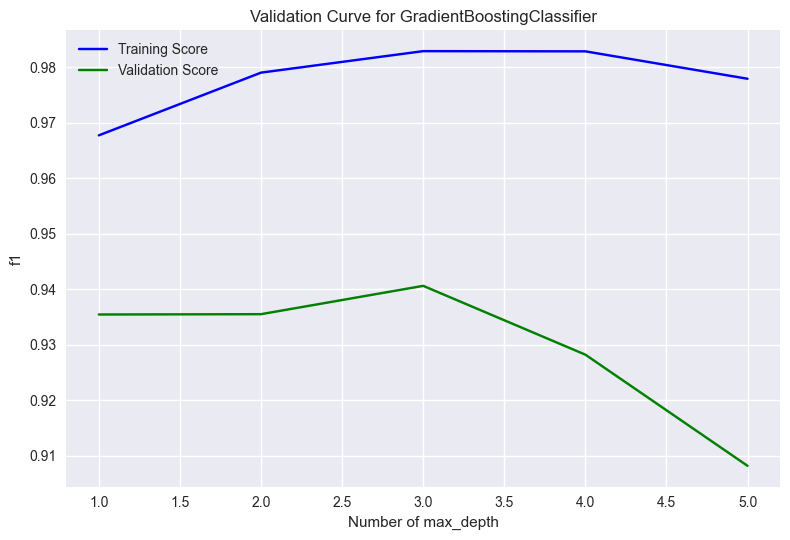

In [12]:
val_curve_params(gbm_model, X, y, "max_depth", range(1,6), scoring="f1")


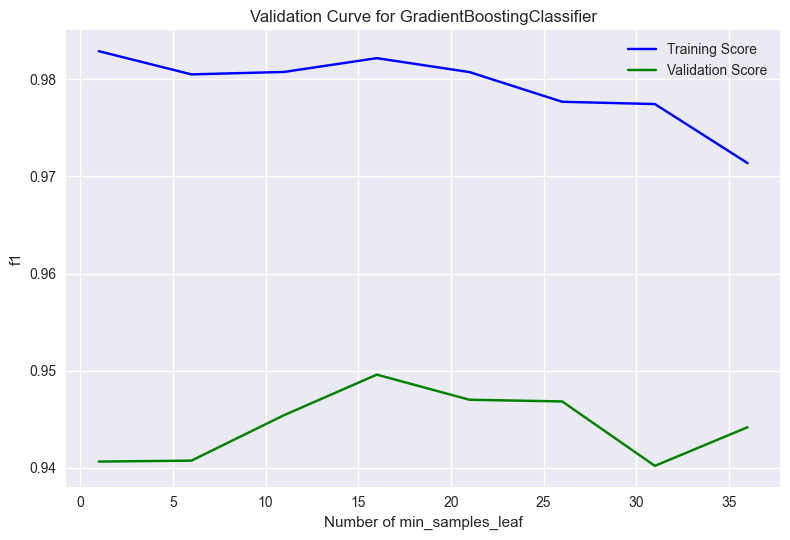

In [13]:
val_curve_params(gbm_model, X, y, "min_samples_leaf", range(1,41,5), scoring="f1")


In [14]:
gbm_params = {"learning_rate": [0.07,0.08],
              "max_depth": [1,2,3],
              "n_estimators": [10,20,30,40,50],
              "subsample": [0.5,0.6],
              "min_samples_split": range(12,16),
              "min_samples_leaf" : range(14,19),
              "max_features":[7,10,13]
             }

gbm_best_grid = GridSearchCV(gbm_model, gbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 3600 candidates, totalling 18000 fits


In [15]:
gbm_best_grid.best_score_

0.9345674044265593

In [16]:
gbm_final = gbm_model.set_params(**gbm_best_grid.best_params_,
                                 random_state=17, ).fit(X, y)
# create final model with best gridsearch hyperparameters

In [17]:
cv_results_final = cross_validate(gbm_final, X, y, cv=10, 
                            scoring=["f1"],
                            return_train_score=True)
print("train f1 score:",cv_results_final['train_f1'].mean())
print("test f1 score:",cv_results_final['test_f1'].mean())

train f1 score: 0.9721391513320518
test f1 score: 0.9489728426060526


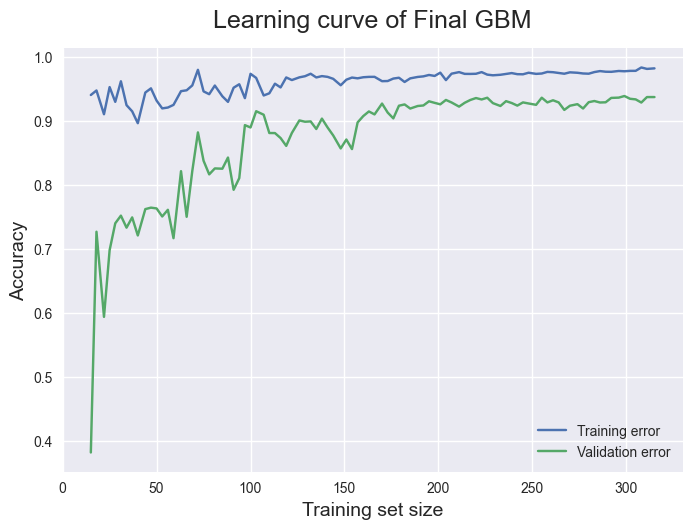

In [19]:
train_sizes_final, train_scores_final, test_scores_final = learning_curve(gbm_final, X, y,
                                                                          cv=10,
                                                        scoring='f1',n_jobs=-1, 
                                                        train_sizes=np.linspace(0.01, 1.0, 100))

train_mean_final = np.mean(train_scores_final, axis=1)
validation_mean_final = np.mean(test_scores_final, axis=1)

plt.plot(train_sizes_final, train_mean, label = 'Training error')
plt.plot(train_sizes_final, validation_mean, label = 'Validation error')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curve of Final GBM', fontsize = 18, y = 1.03)
plt.legend()

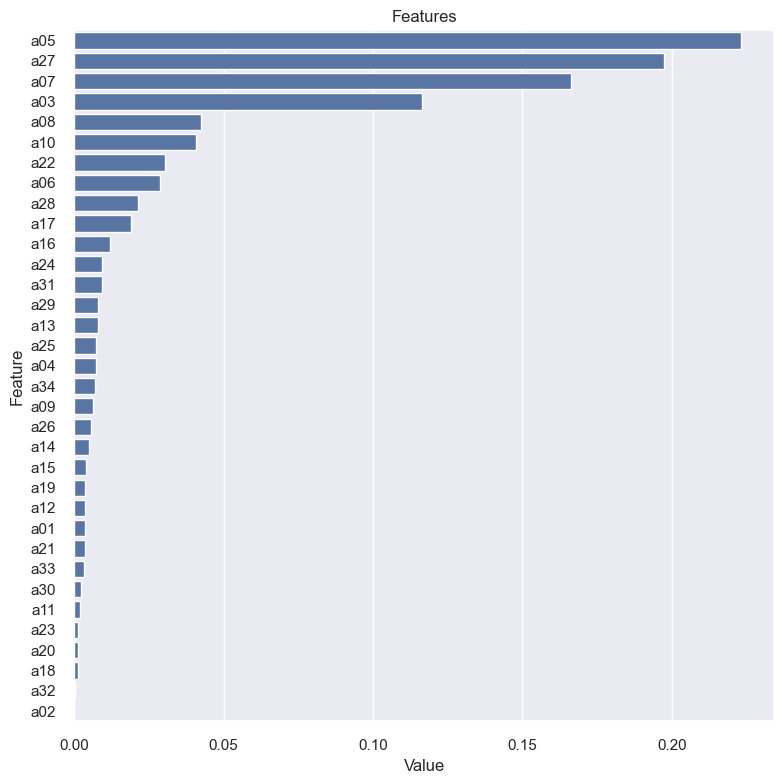

In [20]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(8, 8))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(gbm_final, X)
